In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [4]:
# Load the dataset with specified encoding
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')


In [5]:

# Preprocess the dataset by selecting relevant features
# Replace 'SALES', 'QUANTITYORDERED', 'PRICEEACH' with the actual column names in your dataset
features = data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]

In [6]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

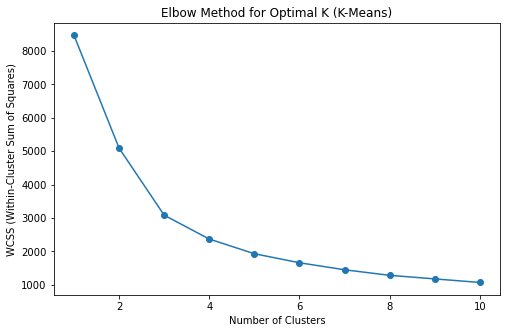

In [8]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [9]:
# Function to calculate the "elbow" as the point with maximum curvature
def optimal_k_elbow(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 10, wcss[-1]
    distances = []
    for i in range(10):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        denominator = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        distances.append(numerator / denominator)
    return distances.index(max(distances)) + 1

In [10]:

# Determine the optimal K
optimal_k = optimal_k_elbow(wcss)

In [11]:
# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [12]:
# Print the number of clusters for K-Means
print(f'Number of clusters determined by K-Means (Elbow Method): {optimal_k}')

# Plot K-Means clusters with colored data points

Number of clusters determined by K-Means (Elbow Method): 3


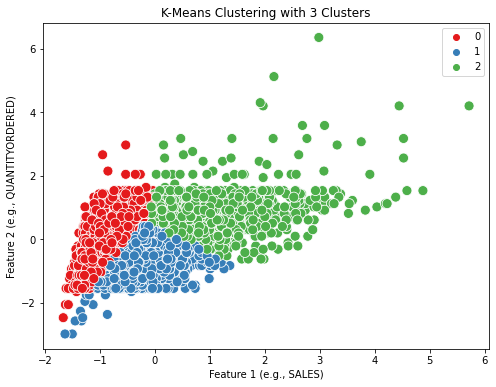

In [13]:
# Plot K-Means clusters with colored data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=kmeans_labels, palette='Set1', s=100)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Feature 1 (e.g., SALES)')
plt.ylabel('Feature 2 (e.g., QUANTITYORDERED)')
plt.show()

In [14]:
# Perform hierarchical clustering using 'ward' linkage method
linked = linkage(scaled_features, method='ward')

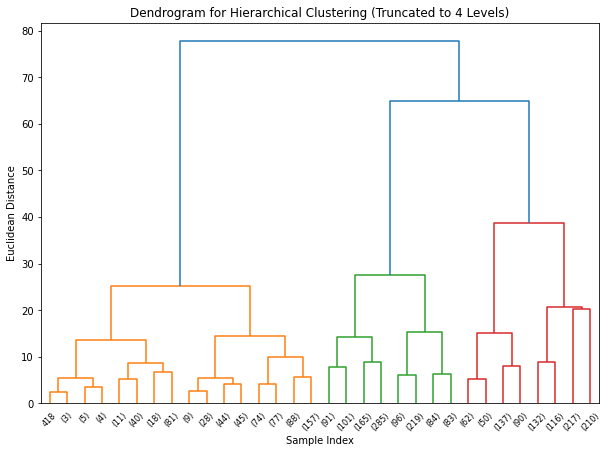

In [15]:
# Plot the dendrogram showing the first 4 levels (truncate_mode='level', p=4)
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=4)
plt.title('Dendrogram for Hierarchical Clustering (Truncated to 4 Levels)')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()


In [16]:
# Function to determine number of clusters from the dendrogram
def get_optimal_clusters_from_dendrogram(linked, threshold=0.7):
    dendrogram_data = dendrogram(linked, no_plot=True)
    distances = np.diff(dendrogram_data['dcoord'], axis=1).ravel()
    threshold_distance = np.percentile(distances, threshold * 100)
    num_clusters = np.sum(distances > threshold_distance) + 1
    return num_clusters

In [22]:

# Determine the optimal number of clusters for hierarchical clustering
optimal_hc = get_optimal_clusters_from_dendrogram(linked)

In [24]:
# Corrected hierarchical clustering without the metric parameter
hc = AgglomerativeClustering(n_clusters=optimal_hc, linkage='ward')
hierarchical_labels = hc.fit_predict(scaled_features)


In [19]:
# Print the number of clusters for hierarchical clustering
print(f'Number of clusters determined by Hierarchical Clustering: {optimal_hc}')

Number of clusters determined by Hierarchical Clustering: 2541
